In [10]:
import segyio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Set the default plot size for matplotlib figures
matplotlib.rcParams['figure.figsize'] = (11.75, 8.5)

base_segy = 'Seismic_data.sgy'

In [6]:
f = segyio.open(base_segy, ignore_geometry=True)
print(segyio.tools.wrap(f.text[0]))

/`_?`??>>/?>?/>/??>??>/??>/>%>`>%>`>
`/_%__+<


In [7]:
for line in f.bin:
    print(f"{line}: {f.bin[line]}")

JobID: 1
LineNumber: 0
ReelNumber: 0
Traces: 0
AuxTraces: 0
Interval: 4000
IntervalOriginal: 0
Samples: 462
SamplesOriginal: 0
Format: 3
EnsembleFold: 0
SortingCode: 4
VerticalSum: 0
SweepFrequencyStart: 0
SweepFrequencyEnd: 0
SweepLength: 0
Sweep: 0
SweepChannel: 0
SweepTaperStart: 0
SweepTaperEnd: 0
Taper: 0
CorrelatedTraces: 0
BinaryGainRecovery: 0
AmplitudeRecovery: 0
MeasurementSystem: 1
ImpulseSignalPolarity: 0
VibratoryPolarity: 0
ExtAuxTraces: 0
ExtSamples: 0
ExtSamplesOriginal: 0
ExtEnsembleFold: 0
SEGYRevision: 1
SEGYRevisionMinor: 0
TraceFlag: 1
ExtendedHeaders: 0


In [8]:
header_idx = 0
for line in f.header[header_idx]:
    print(f"{line}: {f.header[header_idx][line]}")

TRACE_SEQUENCE_LINE: 1
TRACE_SEQUENCE_FILE: 1
FieldRecord: 100
TraceNumber: 0
EnergySourcePoint: 300
CDP: 300
CDP_TRACE: 0
TraceIdentificationCode: 1
NSummedTraces: 0
NStackedTraces: 0
DataUse: 1
offset: 0
ReceiverGroupElevation: 0
SourceSurfaceElevation: 0
SourceDepth: 0
ReceiverDatumElevation: 0
SourceDatumElevation: 0
SourceWaterDepth: 0
GroupWaterDepth: 0
ElevationScalar: 0
SourceGroupScalar: -10
SourceX: 6058355
SourceY: 60735564
GroupX: 0
GroupY: 0
CoordinateUnits: 1
WeatheringVelocity: 0
SubWeatheringVelocity: 0
SourceUpholeTime: 0
GroupUpholeTime: 0
SourceStaticCorrection: 0
GroupStaticCorrection: 0
TotalStaticApplied: 0
LagTimeA: -4
LagTimeB: 0
DelayRecordingTime: 4
MuteTimeStart: 0
MuteTimeEND: 0
TRACE_SAMPLE_COUNT: 462
TRACE_SAMPLE_INTERVAL: 4000
GainType: 0
InstrumentGainConstant: 0
InstrumentInitialGain: 0
Correlated: 0
SweepFrequencyStart: 0
SweepFrequencyEnd: 0
SweepLength: 0
SweepType: 0
SweepTraceTaperLengthStart: 0
SweepTraceTaperLengthEnd: 0
TaperType: 0
AliasFilterF

In [9]:
f = segyio.open(base_segy, ignore_geometry = True)
ntraces    = len(f.trace)
inlines    = []
crosslines = []

for h in f.header:
    inlines.append(h[segyio.su.iline])
    crosslines.append(h[segyio.su.xline])

print(f'{ntraces} traces')
print(f'first 10 inlines: {inlines[:10]}')
print(f'first 10 crosslines: {crosslines[:10]}')

600515 traces
first 10 inlines: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
first 10 crosslines: [300, 301, 302, 303, 304, 305, 306, 307, 308, 309]


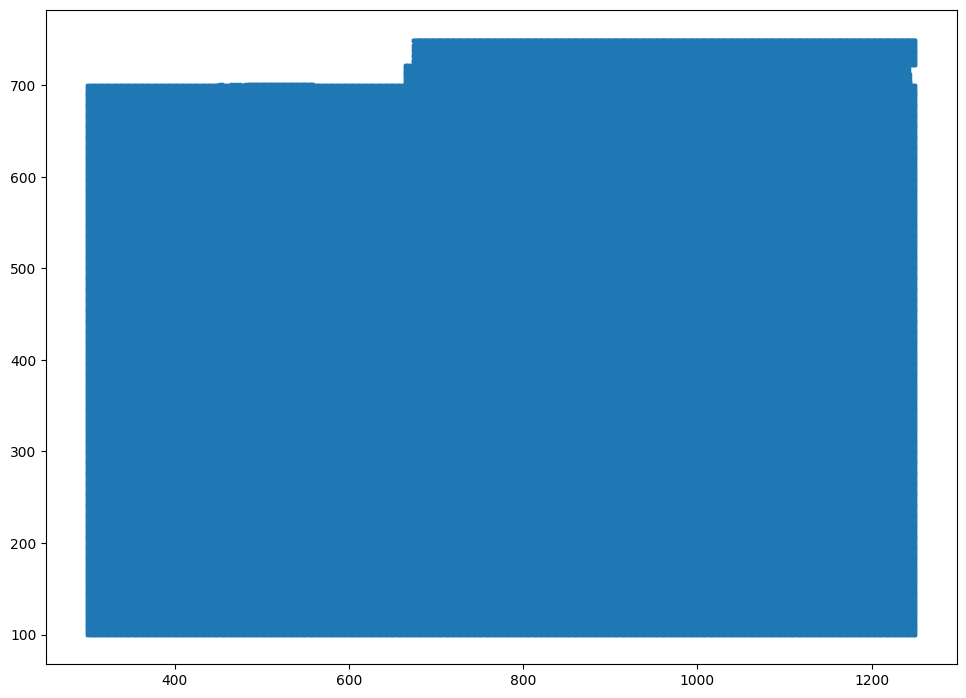

In [11]:
# Plot the inline and crossline as a scatter plot
plt.scatter(crosslines, inlines, marker="s", s=1)

In [12]:
import itertools
uniqil = set(inlines)
uniqxl = set(crosslines)
real = set(zip(inlines, crosslines))
grid = set(itertools.product(uniqil, uniqxl))
missing = grid - real
missing

{(712, 614),
 (734, 373),
 (720, 438),
 (706, 540),
 (725, 553),
 (706, 311),
 (744, 566),
 (711, 618),
 (747, 312),
 (711, 389),
 (750, 317),
 (741, 497),
 (727, 599),
 (746, 612),
 (708, 320),
 (727, 370),
 (713, 435),
 (732, 448),
 (718, 550),
 (704, 615),
 (726, 374),
 (745, 387),
 (743, 314),
 (748, 658),
 (729, 379),
 (734, 494),
 (720, 559),
 (701, 317),
 (739, 609),
 (720, 330),
 (706, 432),
 (747, 433),
 (706, 661),
 (711, 510),
 (750, 438),
 (741, 618),
 (722, 376),
 (741, 389),
 (727, 491),
 (713, 556),
 (735, 315),
 (732, 569),
 (726, 495),
 (745, 508),
 (738, 320),
 (743, 435),
 (748, 550),
 (734, 615),
 (715, 336),
 (701, 438),
 (720, 451),
 (706, 553),
 (747, 554),
 (711, 631),
 (747, 325),
 (733, 390),
 (750, 559),
 (731, 317),
 (750, 330),
 (736, 395),
 (722, 497),
 (741, 510),
 (727, 612),
 (708, 333),
 (713, 448),
 (704, 628),
 (745, 629),
 (726, 387),
 (745, 400),
 (743, 556),
 (710, 379),
 (748, 671),
 (729, 392),
 (715, 457),
 (720, 572),
 (701, 330),
 (742, 331),

In [14]:
ils = sorted(uniqil)
xls = sorted(uniqxl)

lineindex = {
    (il, xl): i
    for i, (il, xl) in enumerate(sorted(grid))

}
lineindex

{(100, 300): 0,
 (100, 301): 1,
 (100, 302): 2,
 (100, 303): 3,
 (100, 304): 4,
 (100, 305): 5,
 (100, 306): 6,
 (100, 307): 7,
 (100, 308): 8,
 (100, 309): 9,
 (100, 310): 10,
 (100, 311): 11,
 (100, 312): 12,
 (100, 313): 13,
 (100, 314): 14,
 (100, 315): 15,
 (100, 316): 16,
 (100, 317): 17,
 (100, 318): 18,
 (100, 319): 19,
 (100, 320): 20,
 (100, 321): 21,
 (100, 322): 22,
 (100, 323): 23,
 (100, 324): 24,
 (100, 325): 25,
 (100, 326): 26,
 (100, 327): 27,
 (100, 328): 28,
 (100, 329): 29,
 (100, 330): 30,
 (100, 331): 31,
 (100, 332): 32,
 (100, 333): 33,
 (100, 334): 34,
 (100, 335): 35,
 (100, 336): 36,
 (100, 337): 37,
 (100, 338): 38,
 (100, 339): 39,
 (100, 340): 40,
 (100, 341): 41,
 (100, 342): 42,
 (100, 343): 43,
 (100, 344): 44,
 (100, 345): 45,
 (100, 346): 46,
 (100, 347): 47,
 (100, 348): 48,
 (100, 349): 49,
 (100, 350): 50,
 (100, 351): 51,
 (100, 352): 52,
 (100, 353): 53,
 (100, 354): 54,
 (100, 355): 55,
 (100, 356): 56,
 (100, 357): 57,
 (100, 358): 58,
 (100, 

In [15]:
d = np.zeros((len(ils), len(xls), len(f.samples)))
lineard = d.reshape(d.shape[0] * d.shape[1], d.shape[2])
for il, xl, trace in zip(inlines, crosslines, f.trace[:]):
    lineard[lineindex[il, xl]][:] = trace[:]
d.shape

(651, 951, 462)

In [16]:
print(type(d))
print(d.dtype)

<class 'numpy.ndarray'>
float64


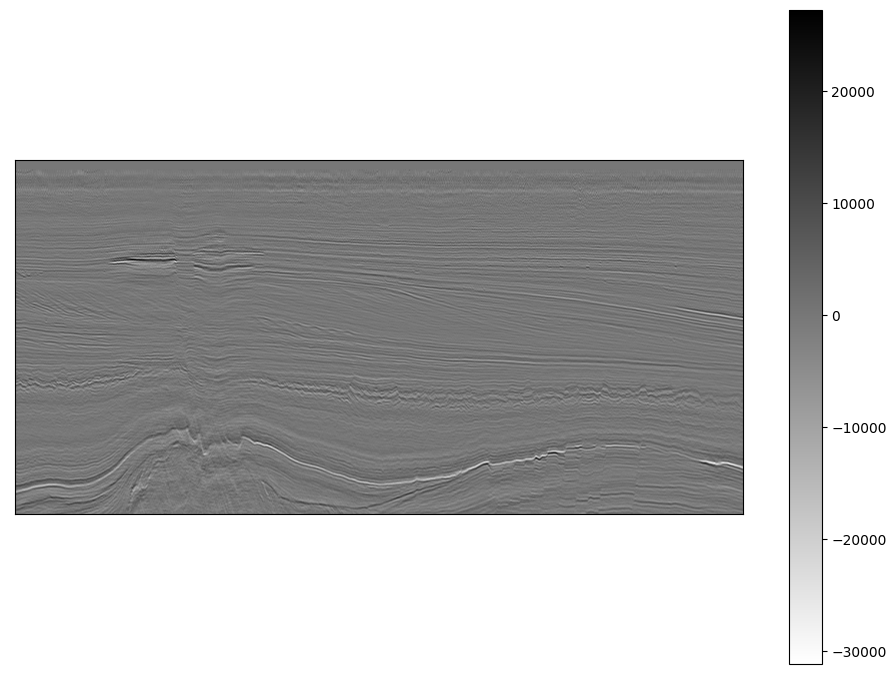

In [38]:
fig = plt.figure()

ax1 = fig.add_subplot()
amp = ax1.imshow(d[42,:,:].T, cmap='gray_r')
fig.colorbar(amp, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.invert_xaxis()

In [23]:
np.savez('Netherlands_data.npz', d)

In [35]:
min_data_value = np.min(d)
max_data_value = np.max(d)
print(max_data_value)
print(min_data_value)

32767.0
-32767.0


In [36]:
normalized_data = (d - min_data_value) / (max_data_value - min_data_value) * 255

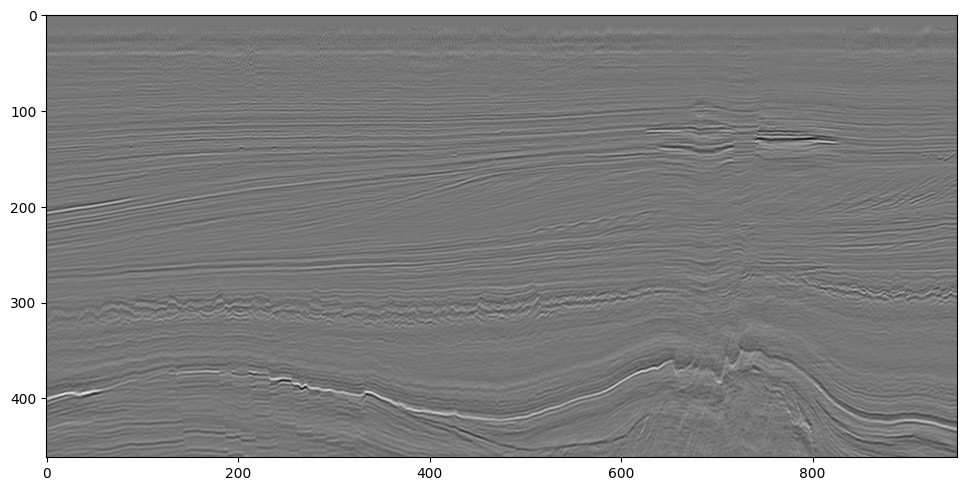

In [37]:
fig, ax = plt.subplots()
ax.imshow(d[42,:,:].T, cmap='gray_r')